# Microsoft Stock Price Prediction

## Introduction: 

This project investigates the prediction of Microsoft's (MSFT), a leading global technology company, future stock prices. We employ various techniques and compare their performance based on RMSE (Root Mean Squared Error) to identify the most effective approach for accurate price prediction.

This statement combines the key elements:

- **Subject**: Microsoft (MSFT) - leading technology company
- **Project Goal**: Predict future stock price
- **Method**: Comparing different techniques
- **Evaluation Criterion**: RMSE
- **Overall Goal**: Identify the best prediction technique

## Dataset
So to get start with the stock price prediction with Python we first need to get a dataset which we are going to use in our model. To get the data do the following:


1.   Go to [Yahoo Finace](https://in.finance.yahoo.com/)
2.   Search for "MFST" data
3.   Click on "Historical Data"
4.   Click the "download"                                      

## OR

In [1]:
# pip install yfinance

In [2]:
import yfinance as yf
df1 = yf.download('MSFT', start = '2014-02-22', end='2024-02-20')


[*********************100%%**********************]  1 of 1 completed


### Importing the Libraries

In [3]:
# pip install pmdarima

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
from math import floor,ceil,sqrt
import sys
import warnings
import datetime as dt
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn.linear_model import LinearRegression
scaler = MinMaxScaler(feature_range=(0, 1))
from pmdarima.arima import auto_arima
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [5]:
# Converting the downloaded data into csv file
df1.to_csv('MSFT.csv')
df = pd.read_csv('MSFT.csv')

### Data Munipulation

In [6]:
# Displaying the data
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-24,37.689999,37.980000,37.540001,37.689999,31.916073,32085100
2014-02-25,37.610001,37.849998,37.349998,37.540001,31.789055,30736500
2014-02-26,37.580002,37.740002,37.189999,37.470001,31.729786,41041800
2014-02-27,37.450001,37.889999,37.230000,37.860001,32.060024,33903400
2014-02-28,37.980000,38.459999,37.820000,38.310001,32.441093,41215000
...,...,...,...,...,...,...
2024-02-12,420.559998,420.739990,414.750000,415.260010,414.493500,21202900
2024-02-13,404.940002,410.070007,403.390015,406.320007,405.570007,27824900
2024-02-14,408.070007,409.839996,404.570007,409.489990,409.489990,20401200


In [7]:
# Checking null values
df1.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-24,False,False,False,False,False,False
2014-02-25,False,False,False,False,False,False
2014-02-26,False,False,False,False,False,False
2014-02-27,False,False,False,False,False,False
2014-02-28,False,False,False,False,False,False
...,...,...,...,...,...,...
2024-02-12,False,False,False,False,False,False
2024-02-13,False,False,False,False,False,False
2024-02-14,False,False,False,False,False,False


In [8]:
# Getting information
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2014-02-24 to 2024-02-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2514 non-null   float64
 1   High       2514 non-null   float64
 2   Low        2514 non-null   float64
 3   Close      2514 non-null   float64
 4   Adj Close  2514 non-null   float64
 5   Volume     2514 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.5 KB


In [9]:
# Describing every things
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,154.613850,156.147613,153.044447,154.674204,149.366721,2.992264e+07
std,104.557151,105.622361,103.471914,104.599064,105.436214,1.377078e+07
min,37.450001,37.740002,37.189999,37.470001,31.729786,7.425600e+06
25%,57.157499,57.527500,56.770000,57.225001,51.778046,2.160120e+07
50%,113.009998,113.715000,111.795002,112.870003,106.974770,2.669990e+07
75%,246.525002,249.747501,244.242504,247.399994,243.185120,3.394218e+07
max,420.559998,420.820007,415.089996,420.549988,419.773712,2.025224e+08


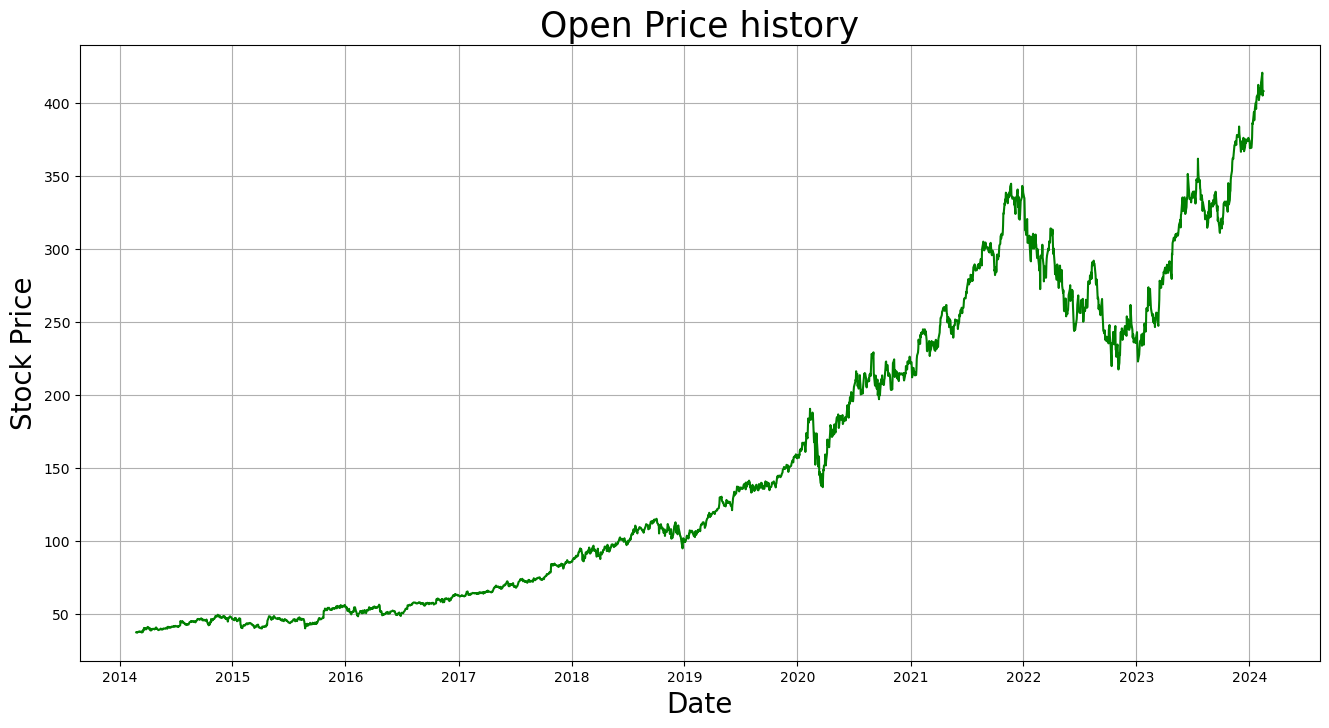

In [10]:
# Graph of Opening price of stock 
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Open'], label='Open Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Open Price history',size=25)
plt.grid(True)

# Show the plot
plt.show()

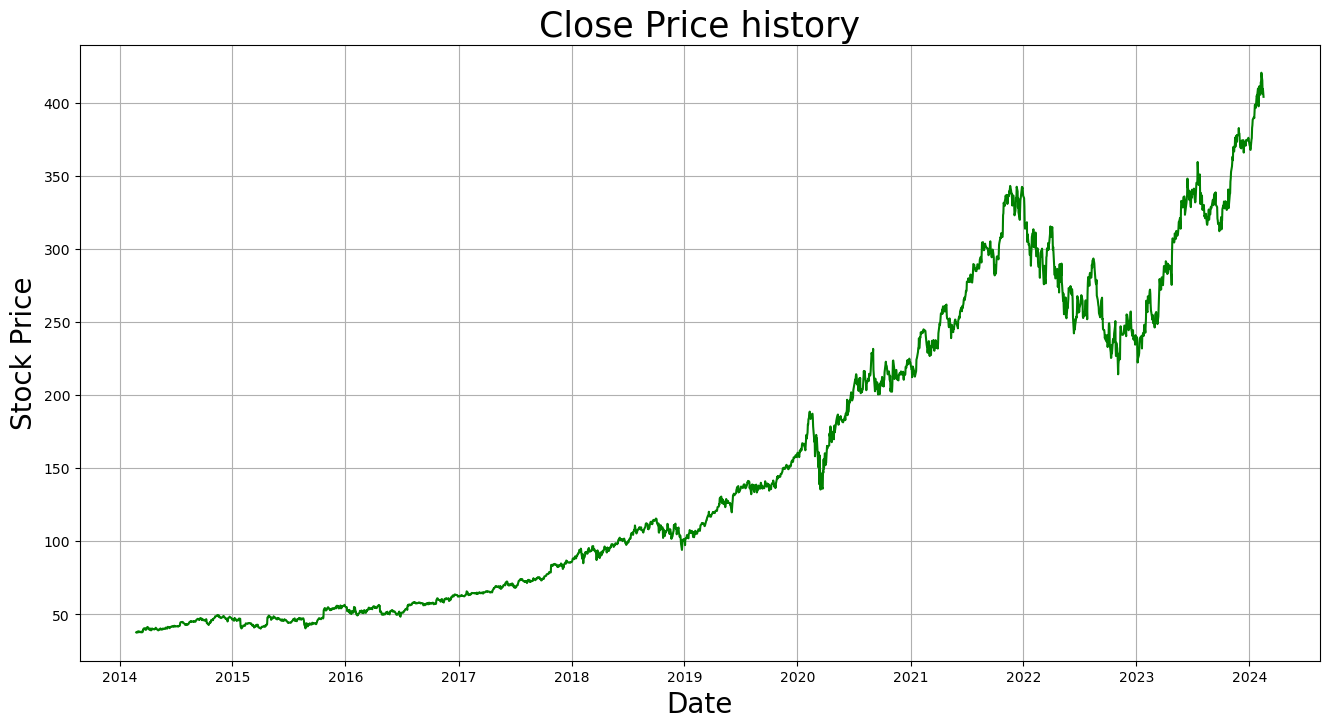

In [11]:
# Graph of Closing price of stock 
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Close Price history',size=25)
plt.grid(True)

# Show the plot
plt.show()

In [12]:
# Correlation of data
correlation = df1.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999871,0.999858,0.999694,0.999626,-0.084992
High,0.999871,1.000000,0.999815,0.999848,0.999780,-0.080289
Low,0.999858,0.999815,1.000000,0.999863,0.999797,-0.090631
Close,0.999694,0.999848,0.999863,1.000000,0.999928,-0.086100
Adj Close,0.999626,0.999780,0.999797,0.999928,1.000000,-0.086467
Volume,-0.084992,-0.080289,-0.090631,-0.086100,-0.086467,1.000000


<Axes: >

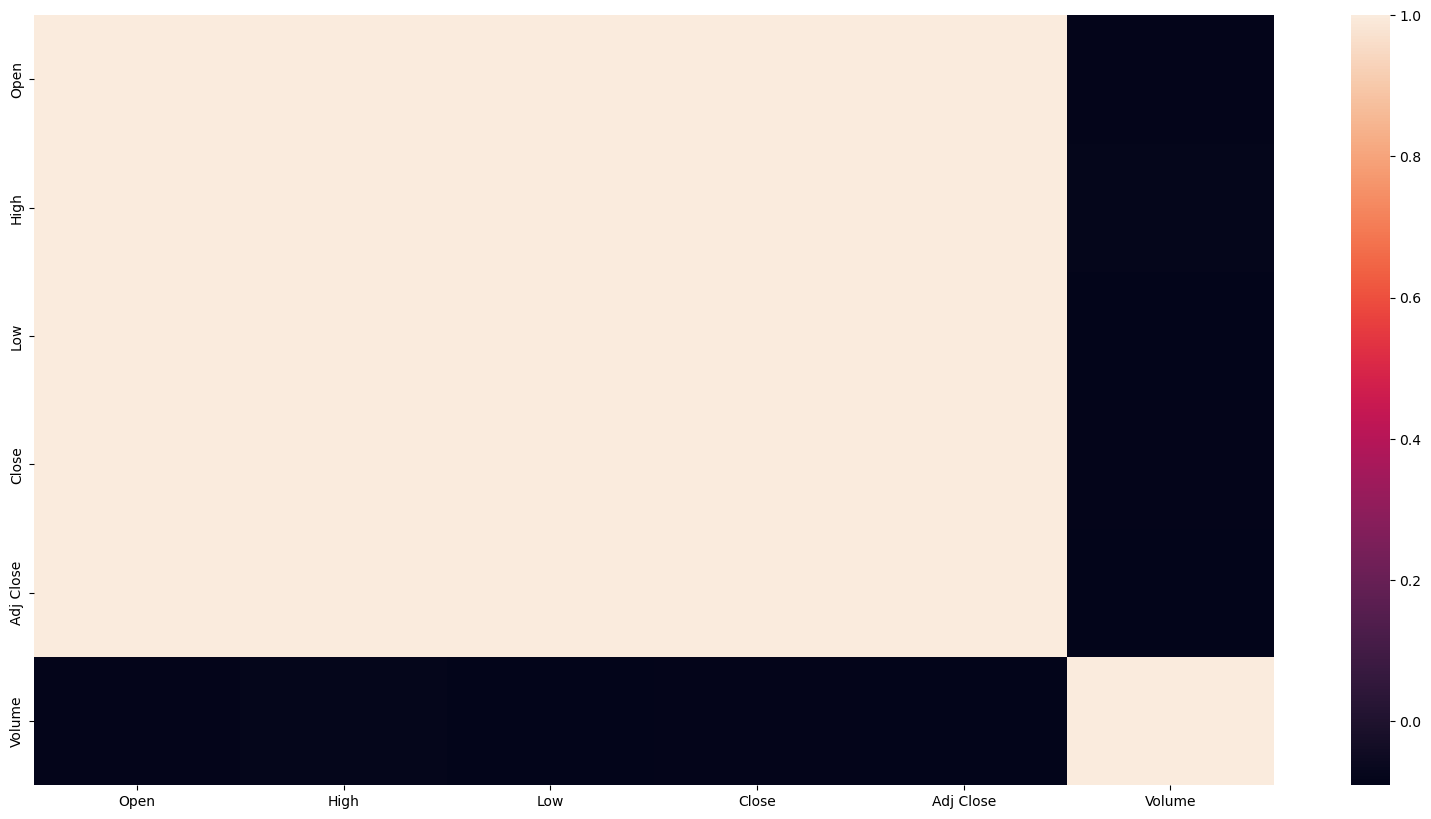

In [13]:
# Heatmap of correlation
import seaborn as sns
sns.heatmap(correlation)

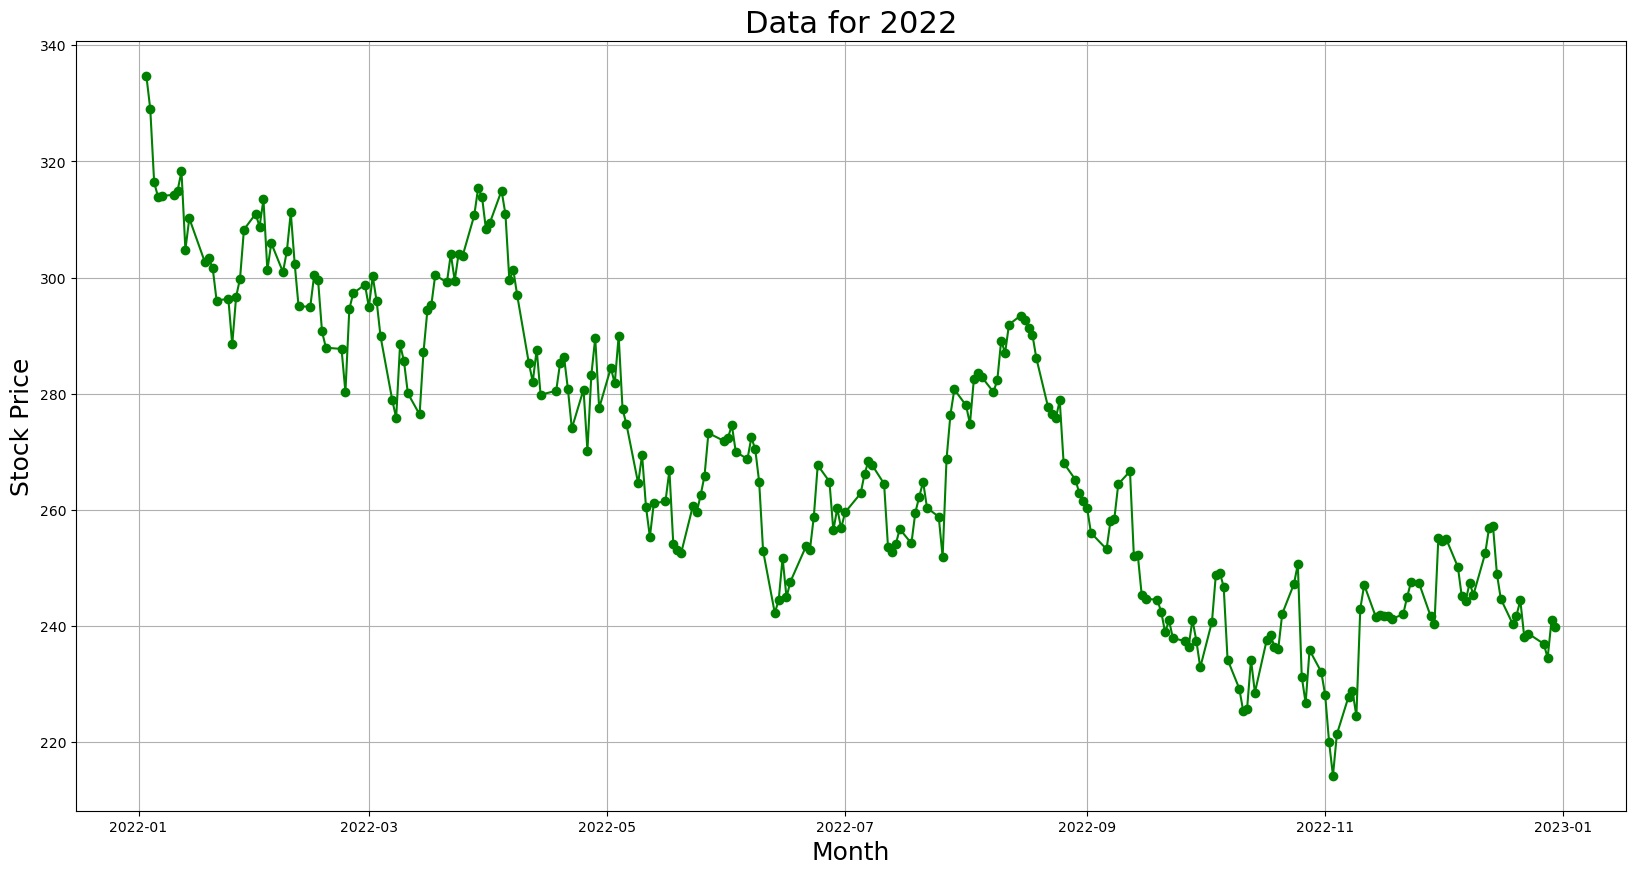

In [14]:
# Graph of 2022 closing price of stock 

df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter data for a single year
desired_year = 2022
single_year_data = df[df['Year'] == desired_year]

# Plot the graph for a single year
plt.plot(single_year_data['Date'], single_year_data['Close'], marker='o', linestyle='-' , color='g')
plt.title(f'Data for {desired_year}' ,fontsize=22)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.grid(True)

# Show the plot
plt.show()

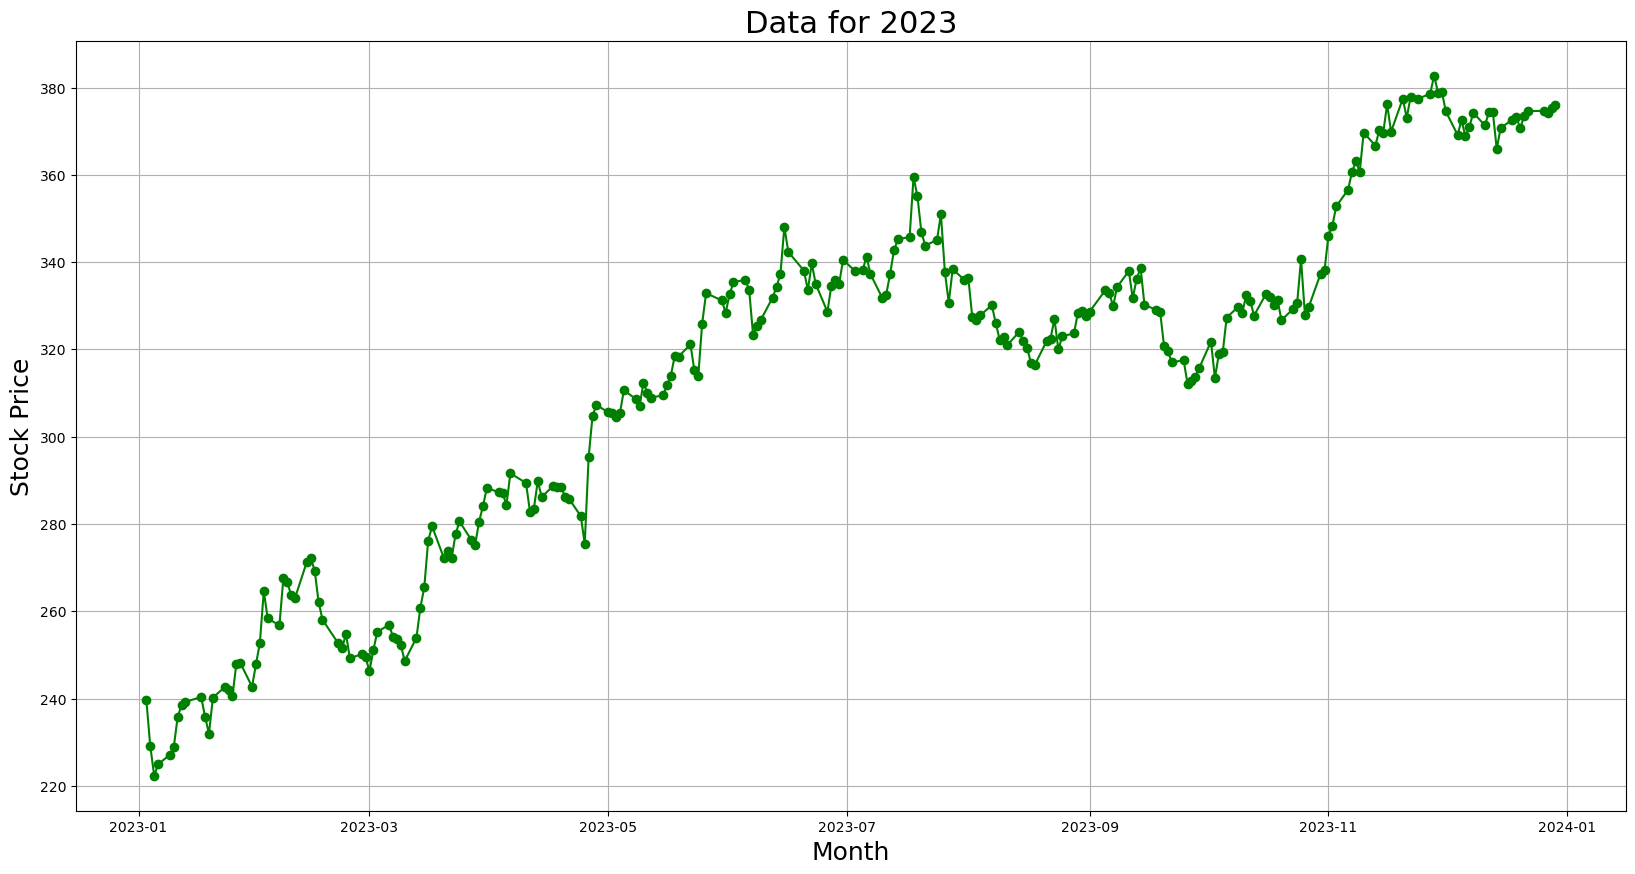

In [15]:
# Graph of 2023 closing price of stock 

df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter data for a single year
desired_year = 2023
single_year_data = df[df['Year'] == desired_year]

# Plot the graph for a single year
plt.plot(single_year_data['Date'], single_year_data['Close'], marker='o', linestyle='-' , color='g')
plt.title(f'Data for {desired_year}',fontsize=22)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.grid(True)

# Show the plot
plt.show()

## Applying Different methods

Here we will be applying different techniques to look which will be the best one to predict the future stock price.

### Moving Average

'Average' is easily one of the most common things we use in our day-to-day lives. For instance, calculating the average marks to determine overall performance, or finding the average temperature of the past few days to get an idea about today’s temperature – these all are routine tasks we do on a regular basis. So this is a good starting point to use on our dataset for making predictions.

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set.

In [16]:
def moving_avg_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]
    
    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]
    
    # Split the data into training and validation sets (75% training, 25% validation)
    train_set = df_new.iloc[:ceil(shape * 0.75)]
    valid_set = df_new.iloc[ceil(shape * 0.75):]
    
    # Print header for stock price prediction using moving average
    print('-----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------')
    print('-----------------------------------------------------------')
    
    # Print shapes of training and validation sets
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    
    # Calculate predictions using moving average
    preds = []
    for i in range(0, valid_set.shape[0]):
        # Calculate moving average
        a = train_set['Close'][len(train_set) - valid_set.shape[0] + i:].sum() + sum(preds)
        b = a / (valid_set.shape[0])
        preds.append(b)
    
    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((np.array(valid_set['Close']) - preds), 2)))
    
    # Print RMSE value on validation set
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    # Add 'Predictions' column to the validation set DataFrame
    valid_set['Predictions'] = preds
    
    # Plot the model training data, actual data, and predicted data
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Moving Averages', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
    
    # Display the validation set DataFrame
    print(valid_set)
    
    # Show the plot
    plt.show()


-----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------
-----------------------------------------------------------
Shape of Training Set (1886, 1)
Shape of Validation Set (628, 1)
RMSE value on validation set: 101.044544858674
-----------------------------------------------------------
-----------------------------------------------------------
                 Close  Predictions
Date                               
2021-08-19  296.769989   187.662580
2021-08-20  304.359985   187.784702
2021-08-23  304.649994   187.906031
2021-08-24  302.619995   188.026327
2021-08-25  302.010010   188.147117
...                ...          ...
2024-02-12  415.260010   211.405674
2024-02-13  406.320007   211.280827
2024-02-14  409.489990   211.150939
2024-02-15  406.559998   211.018059
2024-02-16  404.059998   210.887387

[628 rows x 2 columns]


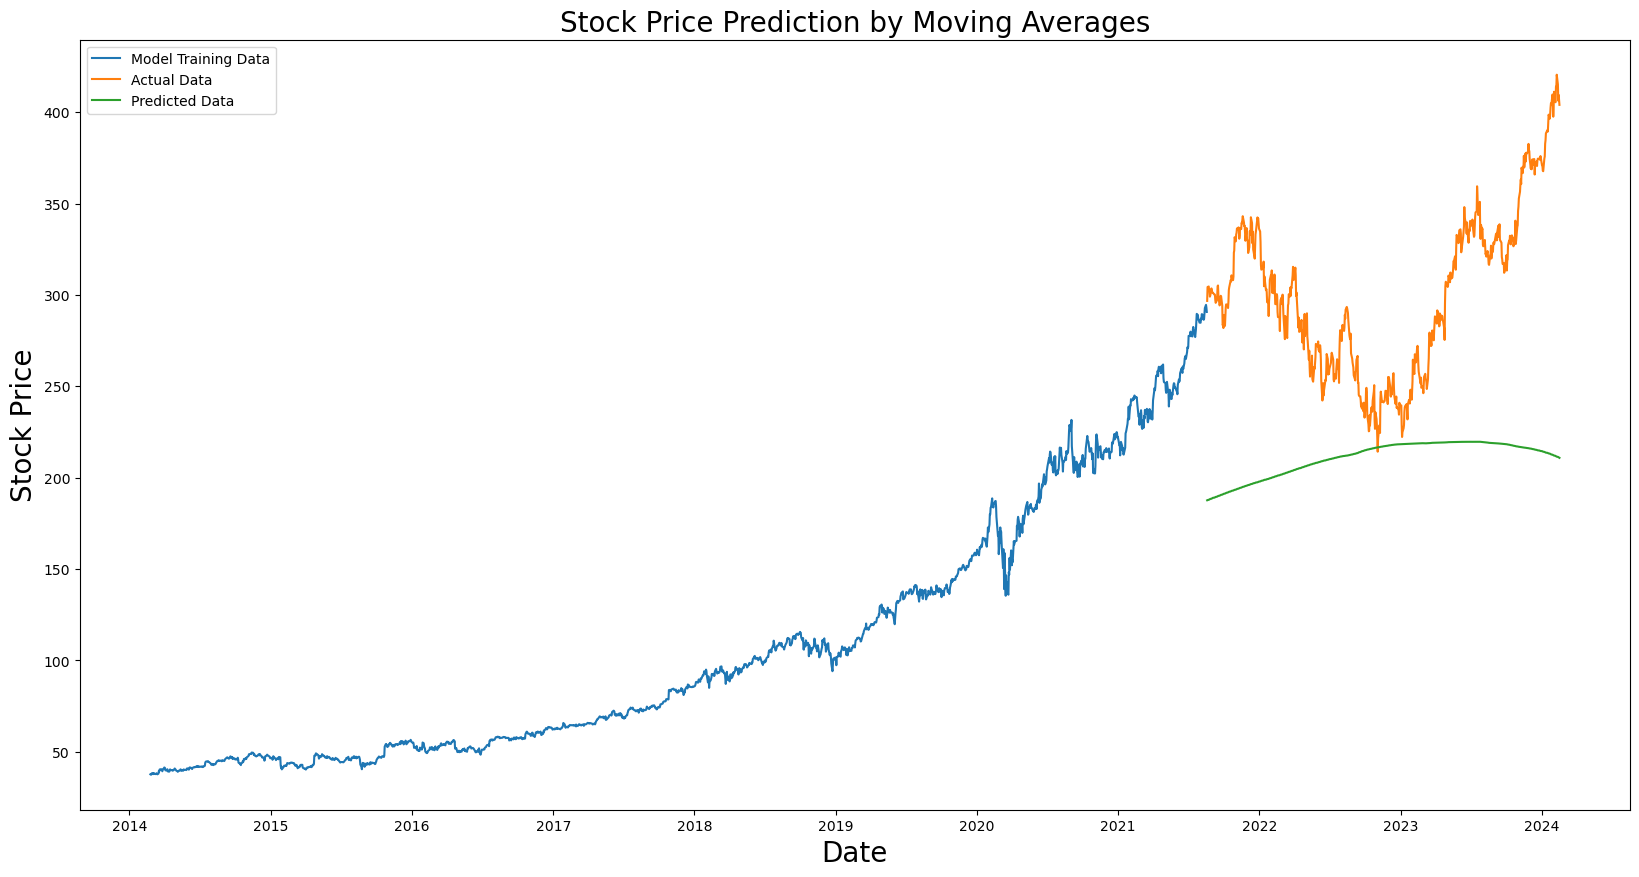

In [17]:
# Call the moving_avg_prediction function with the DataFrame 'df'
moving_avg_prediction(df)

### Linear Regression

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

In [18]:
def linear_regression_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]
    
    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]
    
    # Split the data into training and validation sets (75% training, 25% validation)
    train_set = df_new.iloc[:ceil(shape * 0.75)]
    valid_set = df_new.iloc[ceil(shape * 0.75):]
    
    # Print header for stock price prediction using linear regression
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('-----------------------------------------------------------------')
    
    # Print shapes of training and validation sets
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    
    # Reset index for training and validation sets
    train = train_set.reset_index()
    valid = valid_set.reset_index()
    
    # Convert dates to ordinal values
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    
    # Implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1), y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    
    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((np.array(valid_set['Close']) - preds), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    # Add 'Predictions' column to the validation set DataFrame
    valid_set['Predictions'] = preds
    
    # Plot the model training data, actual data, and predicted data
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Linear Regression', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
    
    # Display the validation set DataFrame
    print(valid_set)
    
    # Show the plot
    plt.show()


-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------
-----------------------------------------------------------------
Shape of Training Set (1886, 1)
Shape of Validation Set (628, 1)
RMSE value on validation set: 71.37209894263468
-----------------------------------------------------------
-----------------------------------------------------------
                 Close  Predictions
Date                               
2021-08-19  296.769989   213.182215
2021-08-20  304.359985   213.260495
2021-08-23  304.649994   213.495333
2021-08-24  302.619995   213.573613
2021-08-25  302.010010   213.651892
...                ...          ...
2024-02-12  415.260010   284.181772
2024-02-13  406.320007   284.260051
2024-02-14  409.489990   284.338331
2024-02-15  406.559998   284.416610
2024-02-16  404.059998   284.494890

[628 rows x 2 columns]


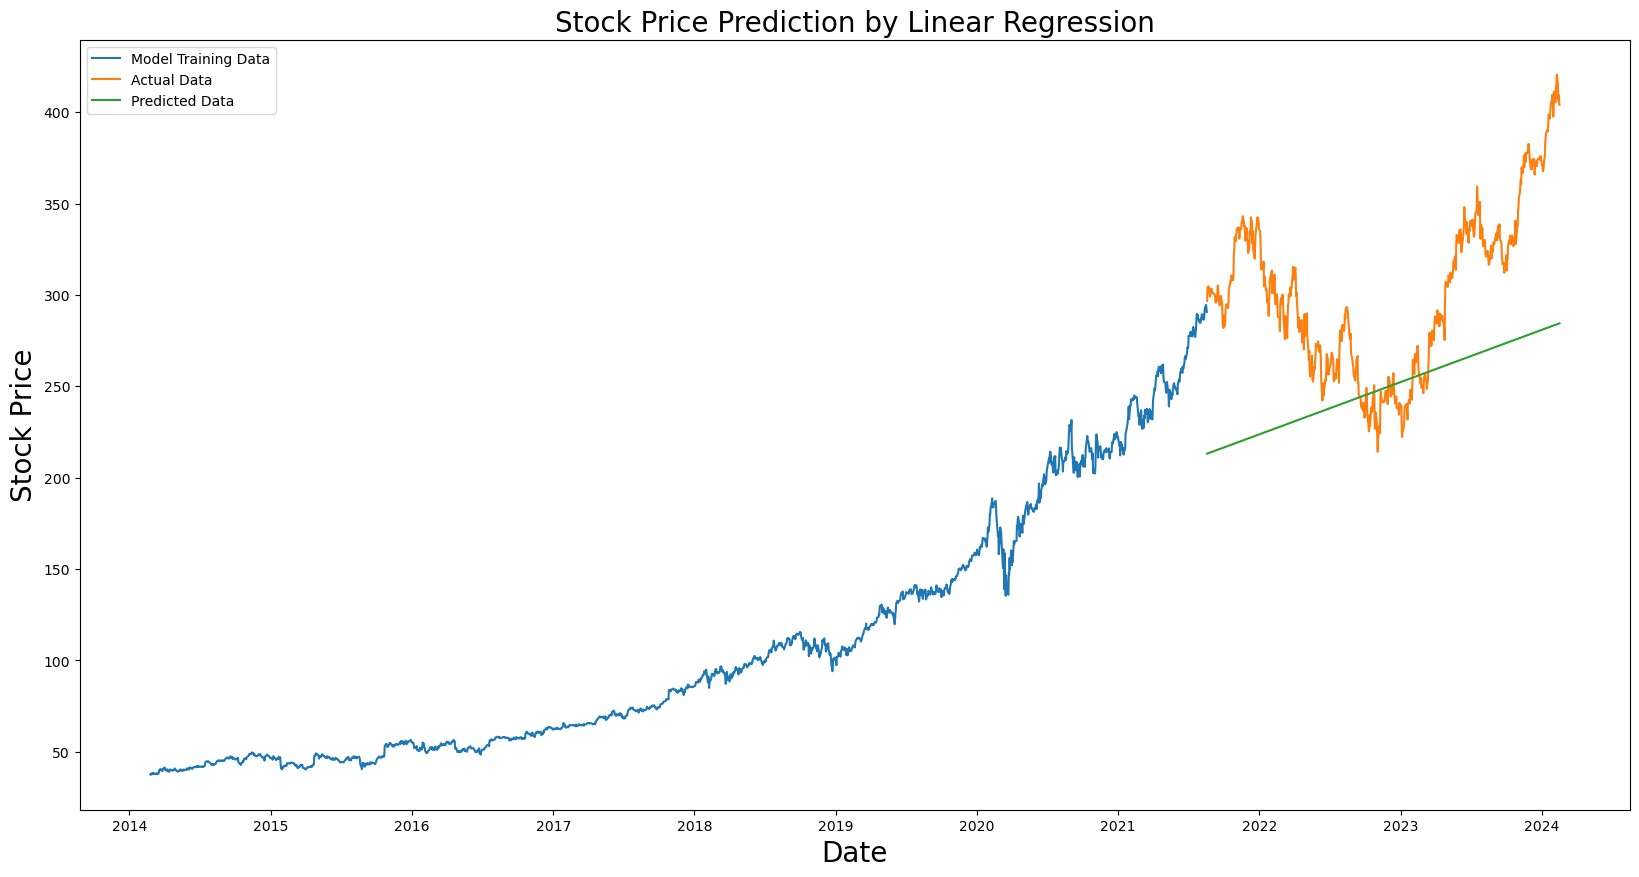

In [19]:
# Call the linear_regression_prediction function with the DataFrame 'df'
linear_regression_prediction(df)

### K-Nearest Neighbours

Another interesting ML algorithm that one can use here is kNN (k nearest neighbours). Based on the independent variables, kNN finds the similarity between new data points and old data points.

In [20]:
def k_nearest_neighbours_predict(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]
    
    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]
    
    # Split the data into training and validation sets (75% training, 25% validation)
    train_set = df_new.iloc[:ceil(shape * 0.75)]
    valid_set = df_new.iloc[ceil(shape * 0.75):]
    
    # Print header for stock price prediction using k-nearest neighbors
    print('-------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------')
    print('-------------------------------------------------------------------')
    
    # Print shapes of training and validation sets
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    
    # Reset index for training and validation sets
    train = train_set.reset_index()
    valid = valid_set.reset_index()
    
    # Convert dates to ordinal values
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    
    # Scale the features
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    
    # Define parameters for grid search
    params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]}
    
    # Initialize K-NeighborsRegressor
    knn = neighbors.KNeighborsRegressor()
    
    # Perform grid search with cross-validation
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train, y_train)
    
    # Make predictions
    preds = model.predict(x_valid)
    
    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((np.array(y_valid) - np.array(preds)), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    # Add 'Predictions' column to the validation set DataFrame
    valid_set['Predictions'] = preds
    
    # Plot the model training data, actual data, and predicted data
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by K-Nearest Neighbors', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
    
    # Display the validation set DataFrame
    print(valid_set)
    
    # Show the plot
    plt.show()


-------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------
-------------------------------------------------------------------
Shape of Training Set (1886, 1)
Shape of Validation Set (628, 1)
RMSE value on validation set: 200.64758719886953
-----------------------------------------------------------
-----------------------------------------------------------
                 Close  Predictions
Date                               
2021-08-19  296.769989    37.775000
2021-08-20  304.359985    37.775000
2021-08-23  304.649994    38.068334
2021-08-24  302.619995    37.933334
2021-08-25  302.010010    37.958333
...                ...          ...
2024-02-12  415.260010   287.896662
2024-02-13  406.320007   288.973333
2024-02-14  409.489990   289.830002
2024-02-15  406.559998   291.336670
2024-02-16  404.059998   291.336670

[628 rows x 2 columns]


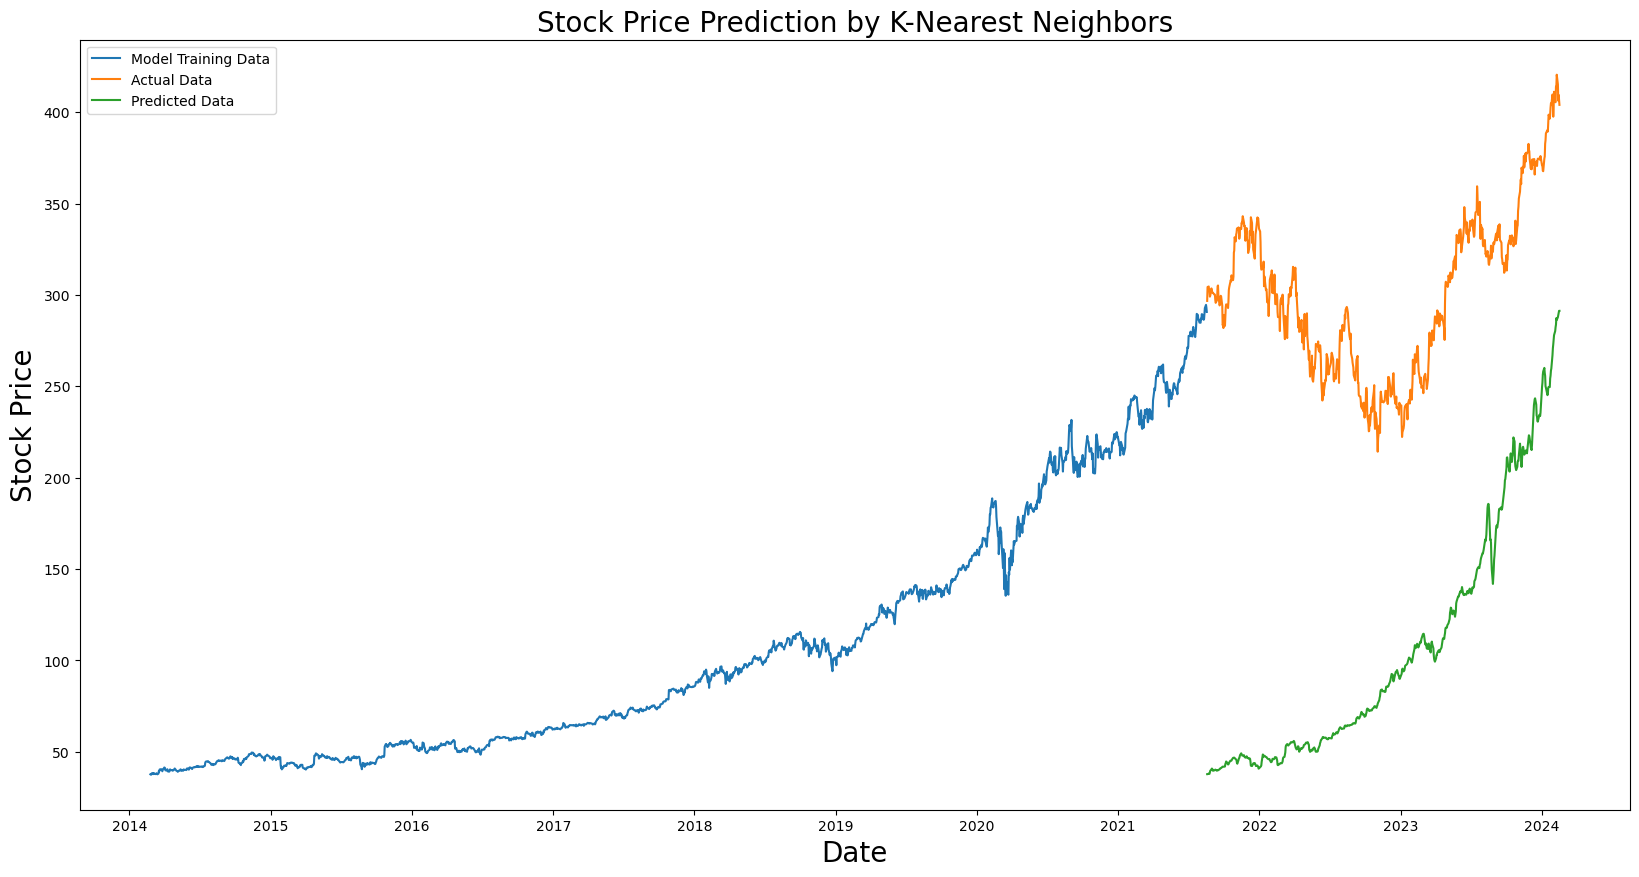

In [21]:
# Call the k_nearest_neighbours_predict function with the DataFrame 'df'
k_nearest_neighbours_predict(df)

### Auto ARIMA

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.<br>ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

1. p (past values used for forecasting the next value)
2. q (past forecast errors used to predict the future values)
3. d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. 

In [22]:
def auto_arima_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]
    
    # Make a copy of the DataFrame to avoid modifying the original data
    df_new = df.copy()
    
    # Sort the DataFrame by index in ascending order
    data = df_new.sort_index(ascending=True, axis=0)
    
    # Reset the index to ensure a supported index for the model
    data.reset_index(inplace=True, drop=True)
    
    # Split the data into training and validation sets (75% training, 25% validation)
    train_set = data[:ceil(shape * 0.75)]
    valid_set = data[ceil(shape * 0.75):]
    
    # Print header for stock price prediction using Auto ARIMA
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------')
    print('----------------------------------------------------------')
    
    # Print shapes of training and validation sets
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    
    # Extract 'Close' prices from training and validation sets
    training = train_set['Close']
    validation = valid_set['Close']
    
    # Fit Auto ARIMA model to training data
    model = auto_arima(training, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                       d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(training)
    
    # Generate forecasts for the validation set
    forecast, conf_int = model.predict(n_periods=len(valid_set), return_conf_int=True)
    
    # Create DataFrame for forecasted values
    forecast_df = pd.DataFrame({'Prediction': forecast}, index=valid_set.index)
    
    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((np.array(valid_set['Close']) - np.array(forecast_df['Prediction'])), 2)))
    
    # Print RMSE value on validation set
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    # Plot the model training data, actual data, and predicted data
    plt.plot(train_set['Close'], label='Training Data')
    plt.plot(valid_set['Close'], label='Actual Data')
    plt.plot(forecast_df['Prediction'], label='Predicted Data')
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Auto ARIMA', size=20)
    plt.legend()
       
    # Show the plot
    plt.show()

----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------
----------------------------------------------------------
Shape of Training Set (1886, 9)
Shape of Validation Set (628, 9)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=11.55 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9566.559, Time=0.25 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9021.498, Time=1.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=11.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=9489.929, Time=0.37 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8743.276, Time=2.71 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=21.78 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=14.09 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=8841.315, Time=2.79 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=8742.184, Time=4.50 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=9009.029, Time=2.0

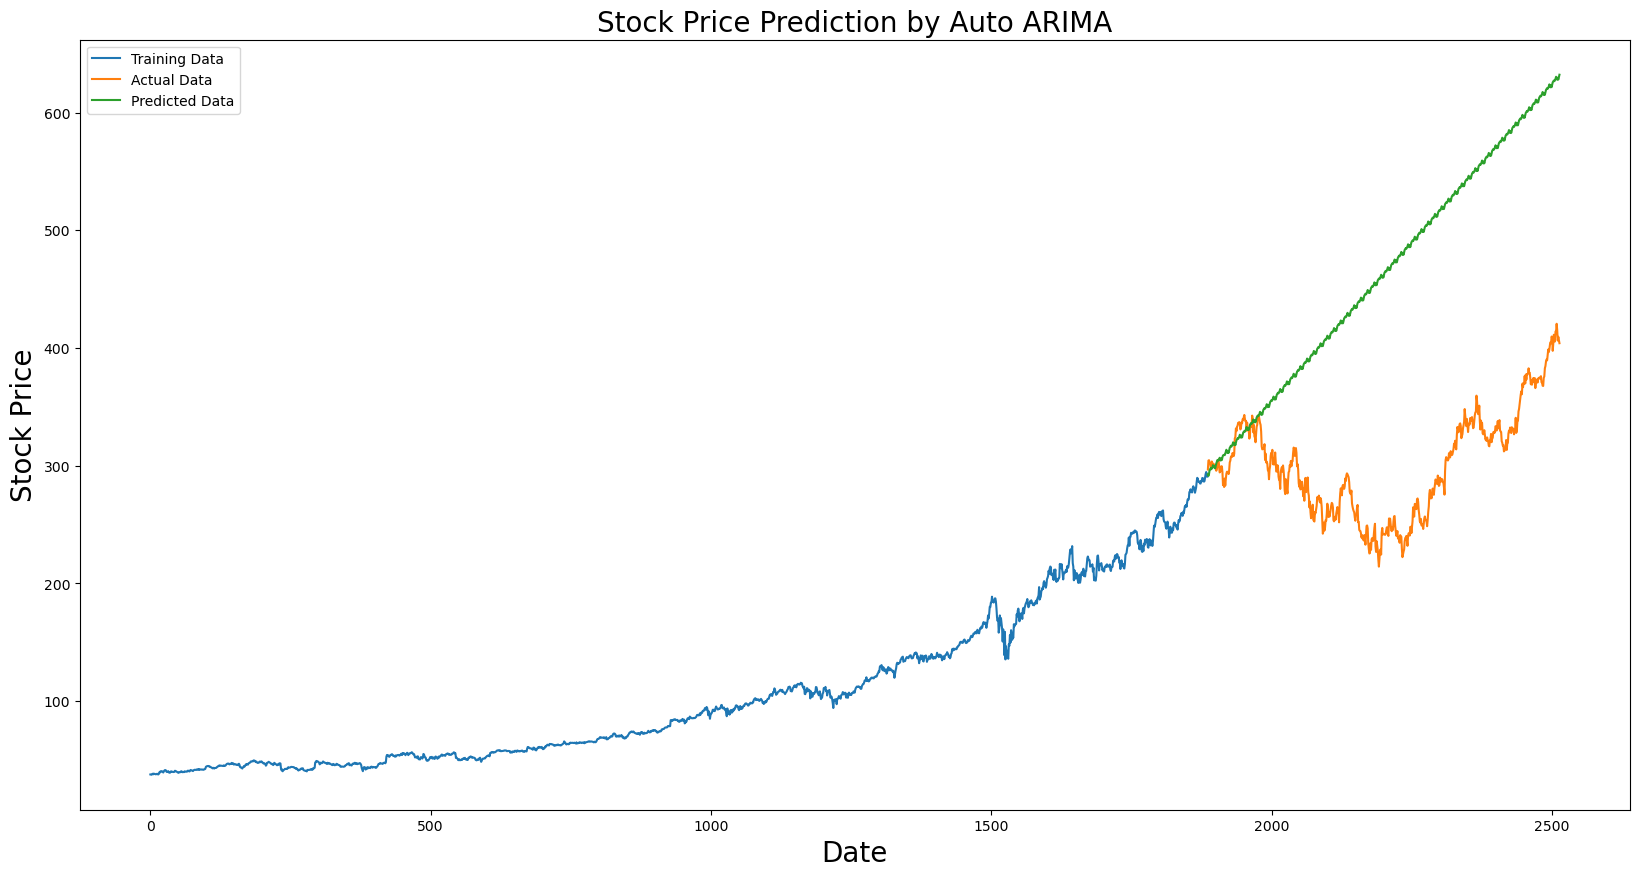

In [23]:
# Call the auto_arima_prediction function with the DataFrame 'df'
auto_arima_prediction(df)

### Long Short Term Memory (LSTM)

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not.

LSTM has three gates:

Input gate: The input gate adds information to the cell state.<br>
Forget gate: It removes the information that is no longer required by the model.<br>
Output gate: Output Gate at LSTM selects the information to be shown as output

In [28]:
def lstm_prediction(df):
    # Get the number of rows in the DataFrame
    shape = df.shape[0]
    
    # Extract the 'Close' column from the DataFrame
    df_new = df[['Close']]

    # Convert DataFrame to numpy array
    dataset = df_new.values
    
    # Split the data into training and validation sets (75% training, 25% validation)
    train = df_new[:ceil(shape * 0.75)]
    valid = df_new[ceil(shape * 0.75):]
    
    # Print header for stock price prediction using LSTM
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')
    
    # Print shapes of training and validation sets
    print('Shape of Training Set', train.shape)
    print('Shape of Validation Set', valid.shape)
    
    # Scale the data using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    # Prepare the training data
    x_train, y_train = [], []
    for i in range(40, len(train)):
        x_train.append(scaled_data[i-40:i, 0])
        y_train.append(scaled_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Train the model
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    
    # Prepare the test data
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Make predictions
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    # Calculate root mean squared error (RMSE)
    rms = np.sqrt(np.mean(np.power((valid - closing_price), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    # Add 'Predictions' column to the validation set DataFrame
    valid['Predictions'] = closing_price
    
    # Plot the model training data, actual data, and predicted data
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
    
    # Display the validation set DataFrame
    print(valid)
    
    # Show the plot
    plt.show()
    
    # Return the trained LSTM model
    return model


-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (1886, 1)
Shape of Validation Set (628, 1)
1846/1846 - 41s - loss: 5.4518e-04 - 41s/epoch - 22ms/step
20/20 [==============================] - 1s 16ms/step
RMSE value on validation set: 12.472392147867762
-----------------------------------------------------------
-----------------------------------------------------------
                 Close  Predictions
Date                               
2021-08-19  296.769989   299.550110
2021-08-20  304.359985   300.404022
2021-08-23  304.649994   301.984192
2021-08-24  302.619995   303.845459
2021-08-25  302.010010   305.547302
...                ...          ...
2024-02-12  415.260010   420.029053
2024-02-13  406.320007   421.523865
2024-02-14  409.489990   422.000580
2024-02-15  406.559998 

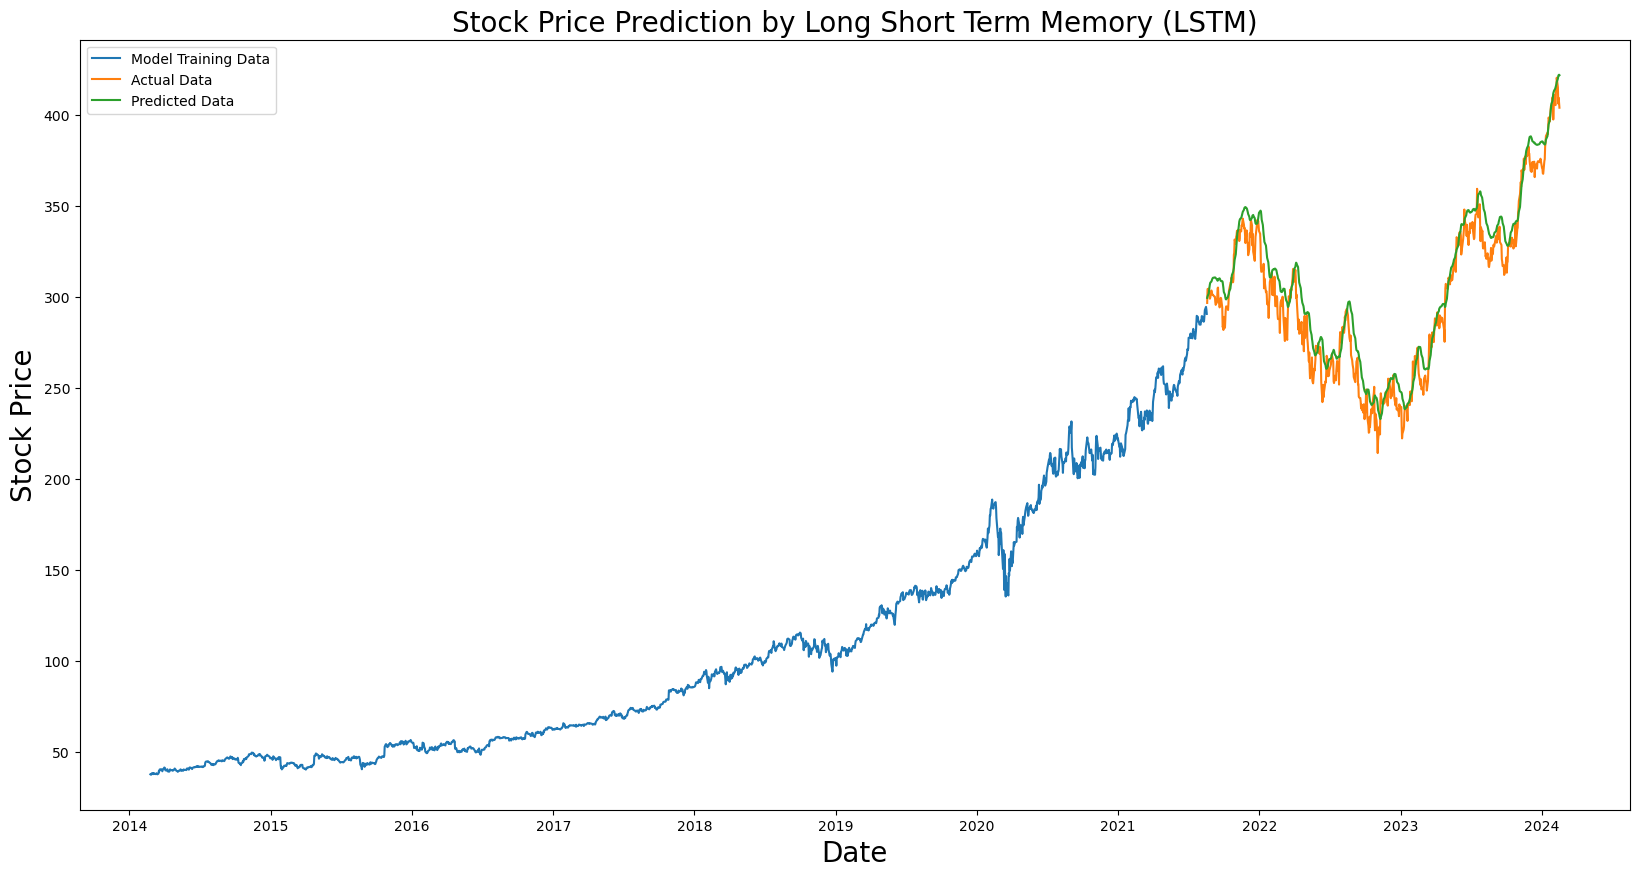

In [29]:
# Call the lstm_prediction function with the DataFrame 'df'
mod=lstm_prediction(df)

## Observation

Based on the plotted graphs and RMSE (Root Mean Squared Error) values, the LSTM (Long Short Term Memory) model appears to be the most effective technique for predicting the future stock price of MSFT stock.

## Predicting the stock price for future

In [26]:
# Get the number of rows in the DataFrame
shape = df.shape[0]

# Extract the 'Close' column from the DataFrame
df_new = df[['Close']]

# Convert DataFrame to numpy array
dataset = df_new.values

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Download historical stock data for Microsoft (MSFT) from Yahoo Finance
msft_quote = yf.download('MSFT',  start='2014-02-22', end='2024-02-20')

# Create a new DataFrame containing only the 'Close' prices
new_df = msft_quote.filter(['Close'])

# Get the closing prices for the last 90 days
last_90_days = new_df[-90:].values

# Scale the last 90 days' closing prices
last_90_days_scaled = scaler.transform(last_90_days)

# Create an empty list to store the test data
X_test = []

# Add the scaled last 90 days' closing prices to the test data list
X_test.append(last_90_days_scaled)

# Convert the test data list into a numpy array
X_test = np.array(X_test)

# Reshape the test data to match the input shape expected by the model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted price using the trained model
pred_price = mod.predict(X_test)


[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 3s 3s/step


In [27]:
# Inverse transform the predicted price to get the original scale
pred_price = scaler.inverse_transform(pred_price)

# Print the predicted price
print("Predicted future price for MSFT stock is :",pred_price)


Predicted future price for MSFT stock is : [[402.62534]]
